In [1]:
from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [5]:
imgs_path = ".\\data\\style\\style\\"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 5 # number of most similar images to retrieve

In [6]:
# load the model
# pre model load
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
# input output set
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [7]:
# 앞서 선언한 경로의 사진 파일들을 불러온다.
files = [imgs_path + x for x in os.listdir(imgs_path) if "png" in x]

print("number of images:",len(files))

number of images: 2184


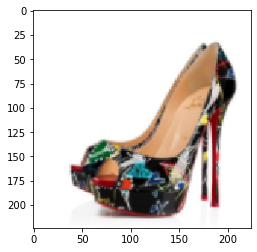

image loaded successfully!


In [8]:
# 이미지 사이즈 조정, 예시 이미지 확인
original = load_img(files[0], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("image loaded successfully!")

In [9]:
# 이미지를 array 구조로 변경 , dim 설정으로 모델에 맞게 설정
numpy_image = img_to_array(original)

image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

processed_image = preprocess_input(image_batch.copy())

image batch size (1, 224, 224, 3)


In [10]:
# 위 summary에서 본 output 에 맞게 나왔는지 확인
img_features = feat_extractor.predict(processed_image)

print("features successfully extracted!")
print("number of image features:",img_features.size)
img_features

features successfully extracted!
number of image features: 4096


array([[0.      , 0.      , 0.982901, ..., 1.664278, 0.      , 0.      ]],
      dtype=float32)

In [11]:
# 비슷한 파일들을 예측한다.
importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [12]:
# 예상 이미지의 형태 확인
imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(2184, 4096)

In [13]:
# 각 사진이 얼마나 유사한지 DataFrame으로 확인
cosSimilarities = cosine_similarity(imgs_features)

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,.\data\style\style\0_0_001.png,.\data\style\style\0_0_002.png,.\data\style\style\0_0_003.png,.\data\style\style\0_0_004.png,.\data\style\style\0_0_005.png,.\data\style\style\0_0_006.png,.\data\style\style\0_0_007.png,.\data\style\style\0_0_008.png,.\data\style\style\0_0_009.png,.\data\style\style\0_0_010.png,...,.\data\style\style\6_9_012.png,.\data\style\style\6_9_013.png,.\data\style\style\6_9_014.png,.\data\style\style\6_9_015.png,.\data\style\style\6_9_016.png,.\data\style\style\6_9_017.png,.\data\style\style\6_9_018.png,.\data\style\style\6_9_019.png,.\data\style\style\6_9_020.png,.\data\style\style\6_9_021.png
.\data\style\style\0_0_001.png,1.000000,0.554049,0.558604,0.569180,0.521653,0.592047,0.503104,0.587524,0.352379,0.402149,...,0.301026,0.259110,0.247527,0.354860,0.276689,0.399458,0.215217,0.263342,0.362405,0.295135
.\data\style\style\0_0_002.png,0.554049,1.000000,0.352109,0.421502,0.522087,0.451603,0.321063,0.683552,0.364152,0.295509,...,0.285045,0.265266,0.204250,0.326158,0.348551,0.518813,0.210395,0.309732,0.334927,0.271448
.\data\style\style\0_0_003.png,0.558604,0.352109,1.000000,0.818587,0.382179,0.444817,0.624104,0.450201,0.348389,0.279833,...,0.403509,0.339665,0.243393,0.399812,0.352428,0.292406,0.250997,0.329958,0.379224,0.276604
.\data\style\style\0_0_004.png,0.569180,0.421502,0.818587,1.000000,0.416594,0.525981,0.636028,0.499594,0.374052,0.305753,...,0.345941,0.351294,0.293219,0.341914,0.342089,0.295215,0.220412,0.323916,0.377290,0.299911
.\data\style\style\0_0_005.png,0.521653,0.522087,0.382179,0.416594,1.000000,0.473533,0.325206,0.599164,0.506743,0.393803,...,0.254234,0.241993,0.264279,0.371300,0.313434,0.401392,0.157740,0.258894,0.314459,0.281436


In [14]:
# function to retrieve the most similar products for a given one
# nb_closest_images = 5 상단에 선언되어있음
# 가장 비슷한 이미지를 찾는 함수
def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    # 우리가 찾고자 하는 원본 이미지
    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    # 예측한 이미지를 5개 까지 표현, 비슷한 정도를 숫자로 표현
    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
original product:


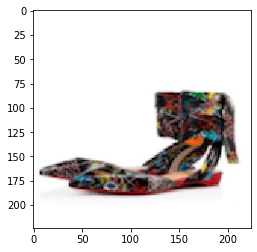

-----------------------------------------------------------------------
most similar products:


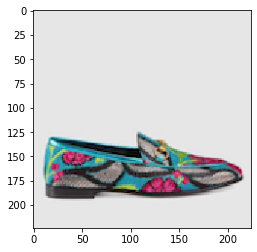

similarity score :  0.69048274


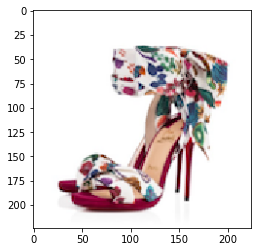

similarity score :  0.68355215


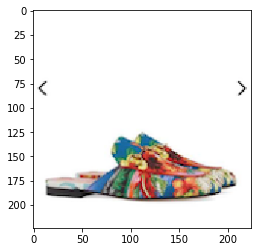

similarity score :  0.6741034


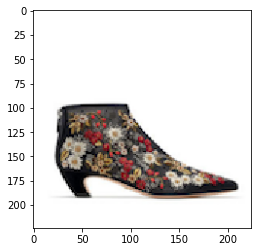

similarity score :  0.6623959


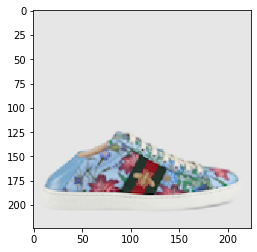

similarity score :  0.6486194


In [15]:
retrieve_most_similar_products(files[1])

-----------------------------------------------------------------------
original product:


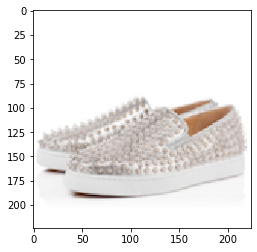

-----------------------------------------------------------------------
most similar products:


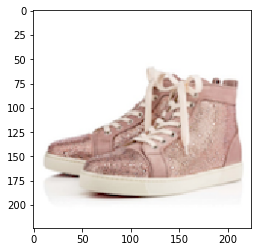

similarity score :  0.8185874


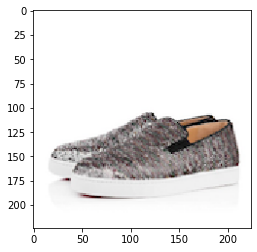

similarity score :  0.7910199


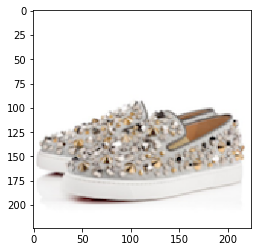

similarity score :  0.7794864


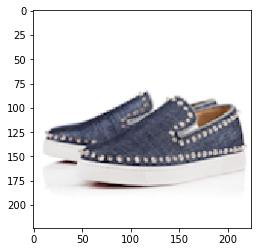

similarity score :  0.7775078


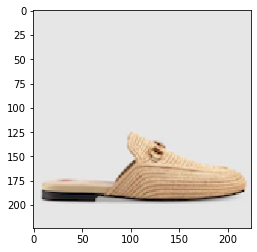

similarity score :  0.7718187


In [16]:
retrieve_most_similar_products(files[2])

-----------------------------------------------------------------------
original product:


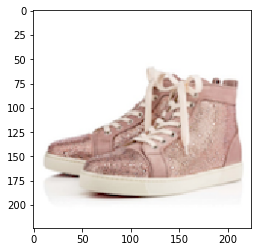

-----------------------------------------------------------------------
most similar products:


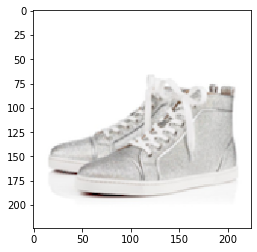

similarity score :  0.84425676


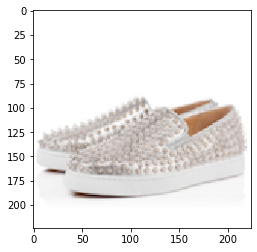

similarity score :  0.8185874


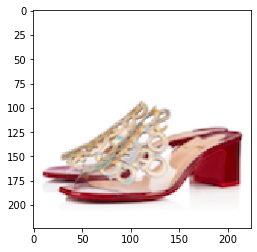

similarity score :  0.78434336


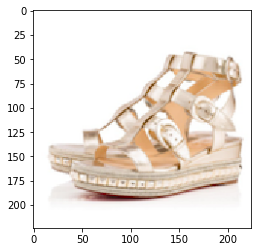

similarity score :  0.76203626


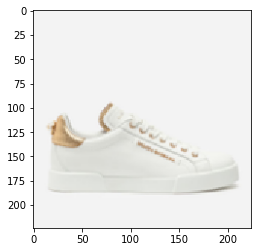

similarity score :  0.75386745


In [17]:
retrieve_most_similar_products(files[3])